In [1]:
from grid import Grid
import numpy as np
from agent import Agent
import time
import pickle
from matplotlib import pyplot as plt

In [2]:
def create_test_grids(amount=1000, size=5):
    grids = []
    for j in range(amount):
        grids.append(Grid(size, random=True))
    with open('test_grids.pickle', 'wb') as fil:
        pickle.dump(grids, fil)


In [3]:
#create_test_grids(1000)


In [4]:
def load_test_grids():
    with open('test_grids.pickle', 'rb') as fil:
        grids = pickle.load(fil)
    return grids

In [5]:
grids = load_test_grids()

In [6]:
def test_MC_first_visit(testgrids, iterations=100, model_based=True, nn_init=False):
    reward_dist = {}
    rewards = []
    for testgrid in testgrids:
        a = Agent()
        if model_based:
            Q, policy = a.mc_first_visit_control(testgrid.copy(), iterations, nn_init=nn_init) # Q value key is (self.agent_pos,self.train.pos,list(self.other_agents.positions)[0])
            grids, action_values, reward = a.run_final_policy(testgrid.copy(), Q, nn_init=nn_init)
        else:
            reward = a.run_model_free_policy(testgrid.copy())
        if reward not in reward_dist:
            reward_dist[reward] = 1
        else:
            reward_dist[reward] += 1
        rewards.append(reward)
        
    return np.mean(rewards), reward_dist

In [7]:
iterations = [0, 1, 3, 10, 30, 100, 300, 1000]
mb_scores = []

mb_agent_deaths = []
mb_other_deaths = []
mb_switch_uses = []
mb_pushes = []
mb_nothing = []
mb_other = []

for it in iterations:
    score, reward_dist = test_MC_first_visit(grids, it, nn_init=False)
    print(it, score, reward_dist)
    mb_agent_deaths.append(0)
    mb_other_deaths.append(0)
    mb_switch_uses.append(0)
    mb_pushes.append(0)
    mb_nothing.append(0)
    mb_other.append(0)
    for key in reward_dist:
        if key<=-5:
            mb_agent_deaths[-1] += reward_dist[key]
        elif key <=-2:
            mb_other_deaths[-1] += reward_dist[key]
        elif key == -0.5:
            mb_pushes[-1] += reward_dist[key]
        elif key ==-0.2:
            mb_switch_uses[-1] += reward_dist[key]
        elif key ==0:
            mb_nothing[-1] += reward_dist[key]
        else:
            mb_other[-1] += reward_dist[key]
        
    mb_scores.append(score)

0 -0.933 {0: 718, -5: 123, -2: 159}
1 -0.9482 {0: 708, -5: 124, -2: 158, -7.5: 1, -2.5: 1, -0.2: 6, -0.5: 2}
3 -0.8391000000000002 {0: 723, -2: 152, -0.2: 12, -5: 96, -0.5: 7, -10.2: 1, -5.5: 3, -2.5: 1, -5.2: 3, -2.2: 2}
10 -0.503 {0: 780, -2: 137, -5: 41, -0.5: 10, -0.2: 30, -7.5: 1, -5.5: 1}
30 -0.2925 {0: 810, -0.2: 59, -2: 119, -0.5: 5, -7.5: 2, -5: 4, -5.2: 1}
100 -0.22210000000000002 {0: 818, -0.2: 73, -2: 102, -0.5: 7}
300 -0.206 {0: 820, -2: 93, -0.2: 78, -0.5: 8, -0.4: 1}
1000 -0.19419999999999998 {0: 823, -0.2: 82, -2: 87, -0.5: 6, -0.4: 2}


In [8]:
scores = []

agent_deaths = []
other_deaths = []
switch_uses = []
pushes = []
nothing = []
other = []

for it in iterations:
    score, reward_dist = test_MC_first_visit(grids, it, nn_init=True)
    print(it, score, reward_dist)
    agent_deaths.append(0)
    other_deaths.append(0)
    switch_uses.append(0)
    pushes.append(0)
    nothing.append(0)
    other.append(0)
    for key in reward_dist:
        if key<=-5:
            agent_deaths[-1] += reward_dist[key]
        elif key <=-2:
            other_deaths[-1] += reward_dist[key]
        elif key == -0.5:
            pushes[-1] += reward_dist[key]
        elif key ==-0.2:
            switch_uses[-1] += reward_dist[key]
        elif key ==0:
            nothing[-1] += reward_dist[key]
        else:
            other[-1] += reward_dist[key]
        
    scores.append(score)
    

0 -0.2988 {0: 774, -0.4: 13, -2: 125, -0.2: 68, -2.2: 7, -2.4000000000000004: 1, -2.6: 1, -0.5: 7, -2.4: 2, -0.6000000000000001: 1, -0.7: 1}
1 -0.25420000000000004 {0: 804, -2: 113, -0.4: 5, -0.2: 68, -2.4000000000000004: 1, -0.5: 4, -0.6000000000000001: 1, -2.5: 1, -2.2: 2, -0.7: 1}
3 -0.2502 {0: 812, -2: 111, -5: 1, -0.2: 61, -0.4: 5, -0.5: 6, -2.5: 1, -0.6000000000000001: 1, -0.7: 1, -2.2: 1}
10 -0.2196 {0: 827, -2: 99, -0.2: 56, -2.2: 1, -0.4: 5, -0.5: 11, -0.7: 1}
30 -0.2068 {0: 830, -0.2: 65, -2: 94, -0.4: 2, -0.5: 8, -1.0: 1}
100 -0.20320000000000002 {0: 827, -2: 89, -0.2: 71, -0.5: 12, -5: 1}
300 -0.1945 {0: 828, -0.2: 73, -2: 87, -0.5: 11, -0.4: 1}
1000 -0.19040000000000004 {0: 829, -0.2: 75, -2: 85, -0.5: 10, -0.4: 1}


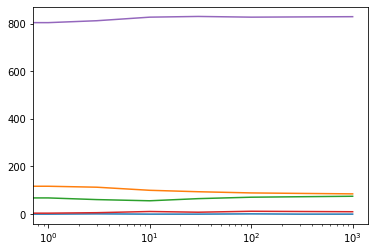

In [9]:
plt.plot(iterations, agent_deaths)
plt.plot(iterations, other_deaths)
plt.plot(iterations, switch_uses)
plt.plot(iterations, pushes)
plt.plot(iterations, nothing)
plt.xscale("log")

([<matplotlib.patches.Wedge at 0x1b0b0236a48>,
 [Text(1.001116557169771, 0.4558131623379743, 'Other person dies'),
  Text(0.7038255870150185, 0.845357642103604, 'Agent pushes other'),
  Text(0.48703399555017274, 0.9863051693965893, 'Switch used'),
  Text(0.21629368862052767, 1.078525400842709, 'Other'),
  Text(-0.8341980821130232, -0.7170171265729671, 'Nothing happens')])

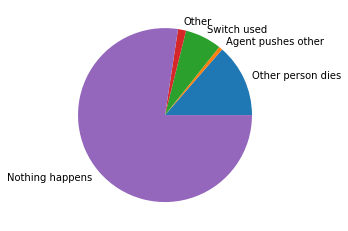

In [25]:
events = [other_deaths[0], pushes[0], switch_uses[0],  other[0], nothing[0]]#agent_deaths[0],
labels = ["Other person dies", "Agent pushes other", "Switch used",  "Other", "Nothing happens"]#"Agent dies", 
plt.pie(events, labels=labels)
#plt.bar([i for i in range(len(events))], events)

([<matplotlib.patches.Wedge at 0x1b0b02e0088>,
 [Text(1.0591684715496263, 0.2969211155765592, 'Other person dies'),
  Text(0.9287607272266394, 0.5894094600203192, 'Agent pushes other'),
  Text(0.7326130609766057, 0.820535253896192, 'Switch used'),
  Text(0.4932215385563091, 0.9832255661363508, 'Other'),
  Text(-0.9342744153984134, -0.5806301031913116, 'Nothing happens')])

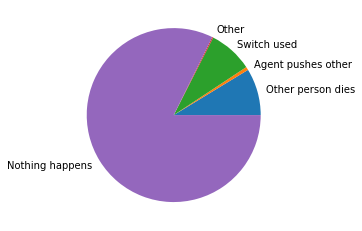

In [27]:
events = [mb_other_deaths[-1], mb_pushes[-1], mb_switch_uses[-1], mb_other[-1], mb_nothing[-1]]#mb_agent_deaths[-1]
labels = ["Other person dies", "Agent pushes other", "Switch used", "Other", "Nothing happens"]#"Agent dies", 
plt.pie(events, labels=labels)

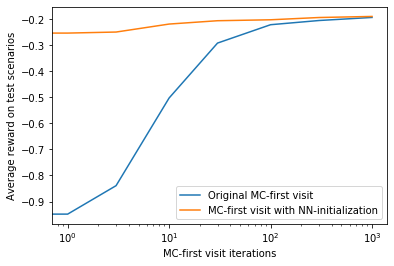

In [12]:
plt.plot(iterations, mb_scores, label = "Original MC-first visit")
plt.plot(iterations, scores, label = "MC-first visit with NN-initialization")
plt.xlabel("MC-first visit iterations")
plt.ylabel("Average reward on test scenarios")

plt.legend()
plt.xscale("log")

Text(0, 0.5, 'Agent deaths/1000')

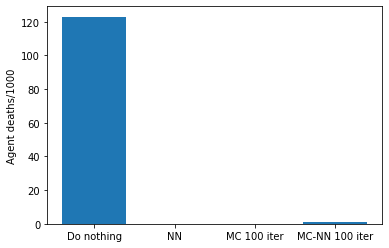

In [13]:
events = [mb_agent_deaths[0], agent_deaths[0], mb_agent_deaths[5], agent_deaths[5]]
plt.bar([i for i in range(len(events))], events, tick_label=['Do nothing','NN','MC 100 iter'
                                                             ,'MC-NN 100 iter'])

plt.ylabel('Agent deaths/1000')

Text(0, 0.5, 'Other deaths/1000')

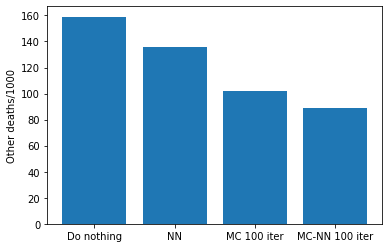

In [14]:
events = [mb_other_deaths[0], other_deaths[0], mb_other_deaths[5], other_deaths[5]]
plt.bar([i for i in range(len(events))], events, tick_label=['Do nothing','NN','MC 100 iter'
                                                             ,'MC-NN 100 iter'])

plt.ylabel('Other deaths/1000')

Text(0, 0.5, 'Switch used and no one dies/1000')

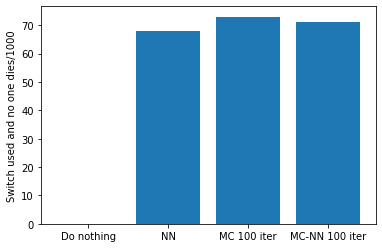

In [15]:
events = [mb_switch_uses[0], switch_uses[0], mb_switch_uses[5], switch_uses[5]]
plt.bar([i for i in range(len(events))], events, tick_label=['Do nothing','NN','MC 100 iter'
                                                             ,'MC-NN 100 iter'])

plt.ylabel('Switch used and no one dies/1000')

Text(0, 0.5, 'Push other used and no one dies/1000')

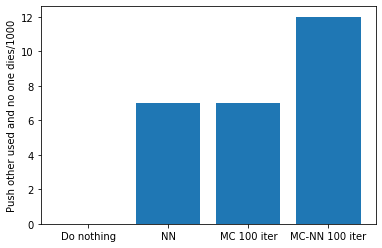

In [16]:
events = [mb_pushes[0], pushes[0], mb_pushes[5], pushes[5]]
plt.bar([i for i in range(len(events))], events, tick_label=['Do nothing','NN','MC 100 iter'
                                                             ,'MC-NN 100 iter'])

plt.ylabel('Push other used and no one dies/1000')

Text(0, 0.5, 'Other behavior/1000')

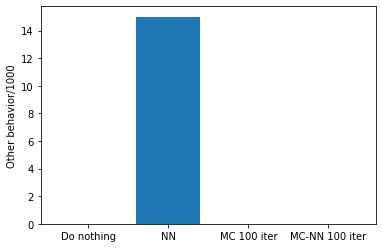

In [17]:
events = [mb_other[0], other[0], mb_other[5], other[5]]
plt.bar([i for i in range(len(events))], events, tick_label=['Do nothing','NN','MC 100 iter'
                                                             ,'MC-NN 100 iter'])

plt.ylabel('Other behavior/1000')

In [18]:
# Model based results, no init
# it, score
# 1 -1.0611
# 3 -0.9010999999999999
# 10 -0.44580000000000003
# 30 -0.2856
# 100 -0.2311
# 300 -0.21
# 1000 -0.2019

# Model based results, with init
# 1 -0.3517
# 3 -0.2993
# 5 -0.27679999999999993
# 10 -0.2627
# 30 -0.2398
# 100 -0.2105